In [1]:
from SVDModel import SVDModel
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(3362)

In [2]:
data = 'netflix'

# MovieLens Small
data_path_ml_small = './data/ml-latest-small/'
df_rating_ml_small = pd.read_csv(data_path_ml_small+'ratings.csv')
df_movies_ml_small = pd.read_csv(data_path_ml_small+'movies.csv')
m_movies_ml_small = df_movies_ml_small['movieId'].nunique()
n_users_ml_small = df_rating_ml_small['userId'].nunique()
n_ratings_ml_small = len(df_rating_ml_small)

df_movies_ml_small.insert(1, 'newMovieId', value=range(1,len(df_movies_ml_small)+1))
newMovieIdDict = {}
for index, movie in df_movies_ml_small.iterrows():
  newMovieIdDict[movie['movieId']] = movie['newMovieId']
df_rating_ml_small.replace({"movieId": newMovieIdDict}, inplace=True)
df_rating_ml_small['rating'] = df_rating_ml_small['rating'].astype(np.int64)

# print(df_rating_ml_small)
# print(df_movies_ml_small)
# print(n_users_ml_small)
# print(n_ratings_ml_small)
# print(m_movies_ml_small)

In [3]:
# Netflix Prize
data_path_netflix = './data/NetflixPrize/'
names = ['userId','rating','timestamp','movieId']
df_netflix = pd.read_csv(data_path_netflix+'data_1.txt', names=names, low_memory=False)[:10000]
# df_netflix_2 = pd.read_csv(data_path_netflix+'data_2.txt', names=names, low_memory=False)
# df_netflix_3 = pd.read_csv(data_path_netflix+'data_3.txt', names=names, low_memory=False)
# df_netflix_4 = pd.read_csv(data_path_netflix+'data_4.txt', names=names, low_memory=False)
# df_netflix = pd.concat([df_netflix,df_netflix_2,df_netflix_3,df_netflix_4], names=names)
df_netflix['movieId'] = df_netflix['movieId'].fillna(method='ffill')
df_netflix = df_netflix.dropna()
df_netflix['rating'] = df_netflix['rating'].astype(np.int64)
df_netflix['movieId'] = df_netflix['movieId'].astype(np.int64)
df_netflix['userId'] = df_netflix['userId'].astype(np.int64)
df_netflix['timestamp'] = pd.to_datetime(df_netflix['timestamp']).view(dtype=np.int64) // 10 ** 9
df_rating_netflix = df_netflix[['userId','movieId','rating','timestamp']]
df_movies_netflix = pd.read_csv(data_path_netflix+'movie_titles.csv',encoding='latin-1',names=['movieId','release_year','title'])
# m_movies_netflix = df_netflix['movieId'].nunique()
m_movies_netflix = df_netflix['movieId'].max()
# n_users_netflix = df_netflix['userId'].nunique()
n_users_netflix = df_netflix['userId'].max()
n_ratings_netflix = len(df_netflix)


# print(df_netflix_rating)
# print(df_netflix_movies)
# print(n_users_netflix)
# print(n_ratings_netflix)
# print(m_movies_netflix)

In [3]:
features = 5
lr = 0.01
epochs = 101
weight_decay = 0.02
stopping = 0.001

svd_ml_small = SVDModel(features=features, lr=lr, epochs=epochs, weight_decay=weight_decay, stopping=stopping)
svd_netflix = SVDModel(features=features, lr=lr, epochs=epochs, weight_decay=weight_decay, stopping=stopping)


In [4]:
svd_ml_small.data_loader(data=df_rating_ml_small, n_items = m_movies_ml_small, n_users=n_users_ml_small)
svd_ml_small.split(0.6,0.8)

In [6]:
svd_netflix.data_loader(data=df_rating_netflix, n_items = m_movies_netflix, n_users=n_users_netflix)
svd_netflix.split(0.6,0.8)

In [ ]:
'''lr==0.01
Epoch :    1  | Train : 6.705  | Valid : 6.984
Epoch :   11  | Train : 0.712  | Valid : 1.399
Epoch :   21  | Train : 0.567  | Valid : 1.311
Epoch :   31  | Train : 0.481  | Valid : 1.318
Epoch :   41  | Train : 0.427  | Valid : 1.349
Epoch :   51  | Train : 0.395  | Valid : 1.376
Epoch :   61  | Train : 0.374  | Valid : 1.398
Epoch :   71  | Train : 0.359  | Valid : 1.415
Epoch :   81  | Train : 0.348  | Valid : 1.430
Epoch :   91  | Train : 0.340  | Valid : 1.442
Epoch :  101  | Train : 0.333  | Valid : 1.453
'''

'''lr==0.0001
Epoch :    1  | Train : 12.498  | Valid : 12.444
Epoch :   11  | Train : 12.398  | Valid : 12.345
Epoch :   21  | Train : 12.254  | Valid : 12.205
Epoch :   31  | Train : 12.036  | Valid : 11.997
Epoch :   41  | Train : 11.709  | Valid : 11.687
Training stopped:
Epoch :   50  | Train : 11.290  | Valid : 11.291
'''

results_ml_small = svd_ml_small.training()

In [ ]:
'''lr==0.01 
Epoch :    1  | Train : 9.496  | Valid : 10.899
Epoch :   11  | Train : 0.066  | Valid : 9.106
Epoch :   21  | Train : 0.033  | Valid : 9.716
Epoch :   31  | Train : 0.028  | Valid : 10.063
Epoch :   41  | Train : 0.024  | Valid : 10.295
Epoch :   51  | Train : 0.021  | Valid : 10.467
Epoch :   61  | Train : 0.018  | Valid : 10.601
Epoch :   71  | Train : 0.015  | Valid : 10.710
Epoch :   81  | Train : 0.013  | Valid : 10.802
Epoch :   91  | Train : 0.012  | Valid : 10.880
Epoch :  101  | Train : 0.011  | Valid : 10.948
'''

'''lr==0.0001 
Epoch :    1  | Train : 13.066  | Valid : 13.184
Epoch :   11  | Train : 12.680  | Valid : 12.802
Epoch :   21  | Train : 12.289  | Valid : 12.442
Epoch :   31  | Train : 11.866  | Valid : 12.096
Epoch :   41  | Train : 11.396  | Valid : 11.759
Epoch :   51  | Train : 10.867  | Valid : 11.429
Epoch :   61  | Train : 10.277  | Valid : 11.105
Epoch :   71  | Train : 9.632  | Valid : 10.788
Epoch :   81  | Train : 8.948  | Valid : 10.481
Epoch :   91  | Train : 8.244  | Valid : 10.188
Epoch :  101  | Train : 7.546  | Valid : 9.912
Training stopped:
Epoch :  101  | Train : 7.546  | Valid : 9.912

'''
resuls_netflix = svd_netflix.training()

Epoch :    1  | Train : 5.725  | Valid : 8.137
Epoch :   11  | Train : 0.081  | Valid : 8.763
Epoch :   21  | Train : 0.037  | Valid : 9.366
Epoch :   31  | Train : 0.030  | Valid : 9.694
Epoch :   41  | Train : 0.027  | Valid : 9.911
Epoch :   51  | Train : 0.024  | Valid : 10.072
Epoch :   61  | Train : 0.022  | Valid : 10.197
Epoch :   71  | Train : 0.020  | Valid : 10.299
Epoch :   81  | Train : 0.018  | Valid : 10.384
Epoch :   91  | Train : 0.017  | Valid : 10.457
Epoch :  101  | Train : 0.015  | Valid : 10.521
Training stopped:
Epoch :  101  | Train : 0.015  | Valid : 10.521


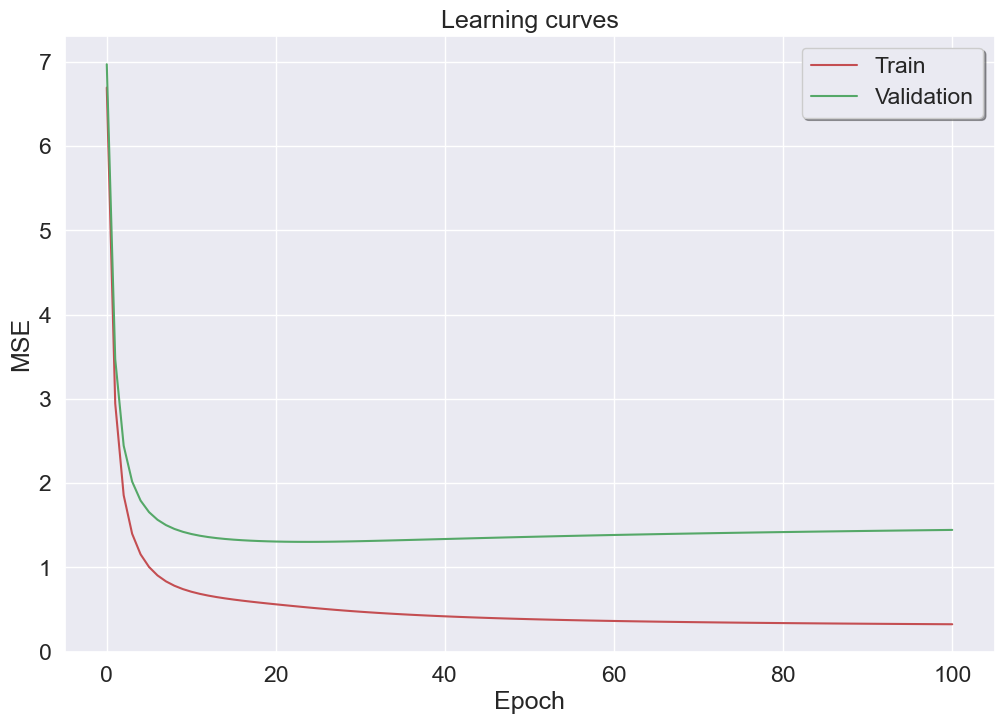

In [ ]:
x = list(range(len(results_ml_small[0])))
k=0

sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 1.5)

plt.plot(x[-k:], results_ml_small[0][-k:], 'r', label="Train")
plt.plot(x[-k:], results_ml_small[1][-k:], 'g', label="Validation")
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
leg = plt.legend(loc='best', shadow=True, fancybox=True)

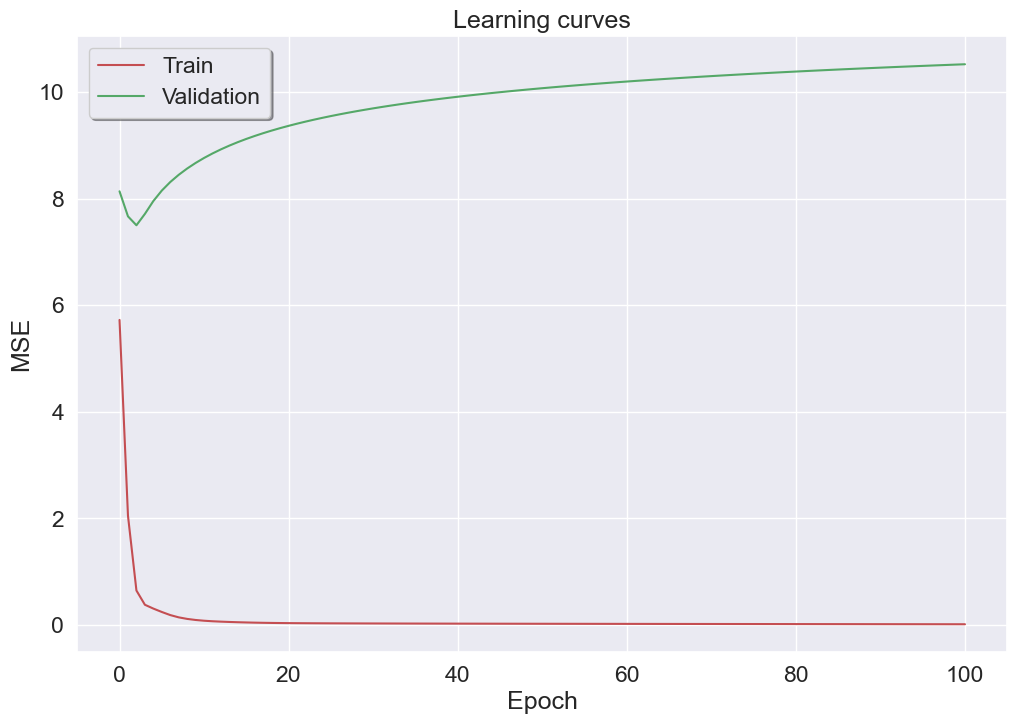

In [ ]:
x = list(range(len(resuls_netflix[0])))
k=0

sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 1.5)

plt.plot(x[-k:], resuls_netflix[0][-k:], 'r', label="Train")
plt.plot(x[-k:], resuls_netflix[1][-k:], 'g', label="Validation")
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
leg = plt.legend(loc='best', shadow=True, fancybox=True)

In [ ]:
svd_ml_small.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   userId     100836 non-null  int64
 1   movieId    100836 non-null  int64
 2   rating     100836 non-null  int64
 3   timestamp  100836 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [ ]:
svd_netflix.data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 1 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   userId     9992 non-null   int64
 1   movieId    9992 non-null   int64
 2   rating     9992 non-null   int64
 3   timestamp  9992 non-null   int64
dtypes: int64(4)
memory usage: 390.3 KB
